# Titanic Dataset

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 20)

In [0]:
# Data Sources
titanic_train_url = 'https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv'
titanic_test_url = 'https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/test.csv'

In [0]:
fill_nans = {
    'Cabin': '',
    'Embarked': 'NoVal'
}

df_train = pd.read_csv(titanic_train_url)
df_test = pd.read_csv(titanic_test_url)

df_train.fillna(value=fill_nans, inplace=True)

In [40]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [41]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,,C


Check values for categorical variables

In [6]:
df_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [7]:
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
       2
Name: Embarked, dtype: int64

In [8]:
df_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

### Survival Rates


*   Passenger Class
*   Sex
*   Family Members Aboard
*   Age Bucket



In [9]:
(df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean()
    .sort_values(by='Survived', ascending=False))

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [10]:
(df_train[['Sex','Survived']].groupby(['Sex'], as_index=False).mean()
    .sort_values(by='Survived', ascending=False))

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [11]:
(df_train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean()
    .sort_values(by='Survived', ascending=False))

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [12]:
(df_train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean()
    .sort_values(by='Survived', ascending=False))

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


342 people survived and 549 people died


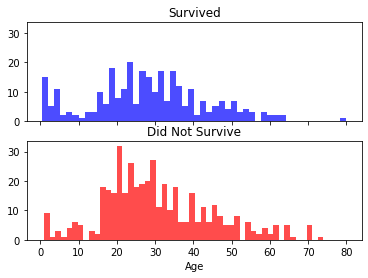

In [13]:
age_survived = df_train[df_train['Survived']==1]['Age']
age_died = df_train[df_train['Survived']!=1]['Age']

fig, axes = plt.subplots(2, 1, sharex=True, sharey=True)
axes[0].hist(age_survived, bins=50, color='b', alpha=0.7)
axes[0].set_title('Survived')
axes[1].hist(age_died, bins=50, color='r', alpha=0.7)
axes[1].set_xlabel('Age')
axes[1].set_title('Did Not Survive')
print('%d people survived and %d people died' %(age_survived.shape[0],age_died.shape[0]))

40 children survived and 29 children died


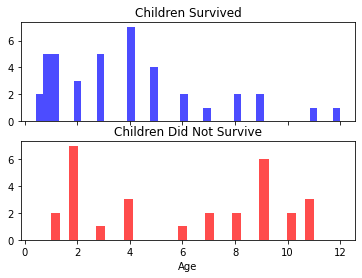

In [14]:
age_children_survived = df_train[(df_train['Survived']==1) & (df_train['Age']<=12)]['Age']
age_children_died = df_train[(df_train['Survived']!=1) & (df_train['Age']<=12)]['Age']

fig, axes = plt.subplots(2, 1, sharex=True, sharey=True)
axes[0].hist(age_children_survived, bins=age_children_survived.shape[0], color='b', alpha=0.7)
axes[0].set_title('Children Survived')
axes[1].hist(age_children_died, bins=age_children_died.shape[0], color='r', alpha=0.7)
axes[1].set_xlabel('Age')
axes[1].set_title('Children Did Not Survive')
print('%d children survived and %d children died' %(age_children_survived.shape[0],age_children_died.shape[0]))

###Prepare for ML


In [0]:
df_train['Sex'] = df_train['Sex'].map({'male': 0, 'female': 1}).astype(int)
df_train['Embarked'] = df_train['Embarked'].map({'NoVal': 0, 'C': 1, 'Q':2, 'S':3}).astype(int)

In [48]:
print('Number of training data Ages with null values: %d' % np.sum(df_train.Age.isnull()))

Number of training data Ages with null values: 177


Identify median ages for passenger's by class & sex<br>
<sub>inspired by @raghav96's [approach](https://github.com/raghav96/datascience/blob/master/Titanic%20Dataset%20Kaggle%20Competition.ipynb)</sub>

In [49]:
df_train.pivot_table(
    index=['Sex', 'Pclass'],
    values=['Age'],
    aggfunc=np.median
)

Age
Sex Pclass      
0   1       40.0
    2       30.0
    3       25.0
1   1       35.0
    2       28.0
    3       21.5

In [50]:
df_train.groupby(['Sex', 'Pclass'])[['Age']].aggregate(np.median)

Age
Sex Pclass      
0   1       40.0
    2       30.0
    3       25.0
1   1       35.0
    2       28.0
    3       21.5

In [0]:
median_age = np.zeros((2,3))
for sex in range(2):
    for pclass in range(1,4):
        row = sex
        col = pclass-1
        
        idx = (df_train['Sex'] == sex) & (df_train['Pclass'] == pclass)
        age_guess = np.median(df_train[idx]['Age'].dropna())
        if np.isnan(age_guess):
            idx_sex_only = (df_train['Sex'] == sex)
            age_guess = df_train[idx]['Age'].dropna().median()
        median_age[row,col] = age_guess

In [52]:
print(median_age)

[[40.  30.  25. ]
 [35.  28.  21.5]]


In [0]:
for sex in range(2):
    for pclass in range(1,4):
        row = sex
        col = pclass-1

        df_train.loc[(df_train.Age.isnull()) & (df_train.Sex == sex) & (df_train.Pclass == pclass),\
                     'Age'] = median_age[row,col] 

In [59]:
X_train = df_train.copy()
X_train = X_train.drop(['Survived','PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
y_train = df_train['Survived'].copy()
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,3
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,3
3,1,1,35.0,1,0,53.1000,3
4,3,0,35.0,0,0,8.0500,3
...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,3
887,1,1,19.0,0,0,30.0000,3
888,3,1,21.5,1,2,23.4500,3
889,1,0,26.0,0,0,30.0000,1


In [85]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [94]:
sgd_scores = cross_val_score(sgd_clf, X_train, y_train, cv=10, scoring='accuracy')
sgd_scores.mean()

0.6737203495630462

In [95]:
from sklearn.svm import SVC

svm_clf = SVC(gamma='auto')
svm_clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [96]:
svm_scores = cross_val_score(svm_clf, X_train, y_train, cv=10)
svm_scores.mean()                            

0.705980024968789

In [97]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100)
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_scores.mean()

0.8126716604244694

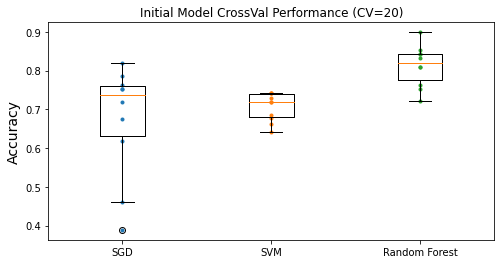

In [98]:
plt.figure(figsize=(8, 4))
plt.plot([1]*10, sgd_scores, ".")
plt.plot([2]*10, svm_scores, ".")
plt.plot([3]*10, forest_scores, ".")
plt.boxplot([sgd_scores, svm_scores, forest_scores], labels=("SGD","SVM","Random Forest"))
plt.ylabel("Accuracy", fontsize=14)
plt.title('Initial Model CrossVal Performance (CV=20)')
plt.show()

### To Do
**Improve Training Models (w/ Cross Validation)**
*     Try additional models
*     Try adding/combining features
*     Hyperparameter tuning

**Assess Test Accuracy** using final model choice(s)